In [4]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import scipy.io
import os
import re
from utils import *

In [64]:
###############################################
runNumbers = [55]  # enter the run numbers to be loaded
folder = '/sdf/data/lcls/ds/cxi/cxil1015022/hdf5/smalldata/' # insert here the directory path where .h5 files are stored
###############################################
# (1) keys_to_combine: some keys loaded for each shot & stored per shot 
# (2) keys_to_sum: some keys loaded per each run and added 
# (3) keys_to_check : check if some keys exits and have same values in all runs and load these keys 
keys_to_combine = ['jungfrau4M/azav_mask0_azav', # Unfiltered
                   'jungfrau4M/azav_mask1_azav', # Filtered
                   'ipm_dg2/sum',
                    #'ipm_dg3/sum',
                   #'ipm_hfx_dg2/sum',
                   'gas_detector/f_11_ENRC',
                   'ebeam/photon_energy',
                   'evr/code_183',
                   'evr/code_137',
                   'evr/code_141',
                   'lightStatus/xray',
                  #'CXI-DG2-BMMON-WF/cxi_dg2_bmmon_wf_rebin_data',
                  'jungfrau4M/Full_thres_sum',
                  'feeBld/hproj']

keys_to_sum = ['Sums/jungfrau4M_calib']
#               'Sums/jungfrau4M_calib_thresADU1']

keys_to_check = ['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_q',
                'UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_q',
                'UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_qbin',
                'UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_qbin',
                'UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_qbins',
                'UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_qbins',
                'UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_userMask',
                'UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_userMask',
                'UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_matrix_q', # This are only needed once
                'UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_matrix_phi', # This are only needed once
                'UserDataCfg/jungfrau4M/x',
                'UserDataCfg/jungfrau4M/y',
                'UserDataCfg/jungfrau4M/z',
                'UserDataCfg/jungfrau4M/cmask']
# Load the data in
data = combineRuns(runNumbers, folder, keys_to_combine, keys_to_sum, keys_to_check, verbose=False)  # this is the function to load the data with defined keys

# Unfiltered Data
azav = np.squeeze(data['jungfrau4M/azav_mask0_azav']) # I(q) : 1D azimuthal average of signals in each q bin
qbin = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_qbin'] # q bin-size
q = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_q'] # q bins 
qbins = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_qbins'] # q bins
userMask = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_userMask'].astype(bool) # User mask for this region
# Filtered Data
azavFiltered = np.squeeze(data['jungfrau4M/azav_mask1_azav']) # I(q) : 1D azimuthal average of signals in each q bin
qbinFiltered = data['UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_qbin'] # q bin-size
qFiltered = data['UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_q'] # q bins 
qbinsFiltered = data['UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_qbins'] # q bins
userMaskFiltered = data['UserDataCfg/jungfrau4M/azav_mask1__azav_mask1_userMask'].astype(bool) # User mask for this region
# Other Data
matrix_q = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_matrix_q'].reshape(8,512,1024) # Q values J4M shaped
matrix_phi = data['UserDataCfg/jungfrau4M/azav_mask0__azav_mask0_matrix_phi'].reshape(8,512,1024) # phi valyes J4M shaped
xrayOn = data['evr/code_137'].astype(bool)  # xray on events
xrayOn2 = data['lightStatus/xray'].astype(bool)  # xray on events
jungfrau_sum = data['Sums/jungfrau4M_calib']  # Total Jungfrau detector counts summed in a run
#jungfrau_sum = data['Sums/jungfrau4M_calib_thresADU1']   # Total Jungfrau detector counts with Thresholds added, summed in a run 
x = data['UserDataCfg/jungfrau4M/x'] # coordinates of Jungfrau detector x,y,z
y = data['UserDataCfg/jungfrau4M/y']
z = data['UserDataCfg/jungfrau4M/z'] 

cmask = data['UserDataCfg/jungfrau4M/cmask'].astype(bool) # Mask for detector created 
run_indicator = data['run_indicator'] # run indicator for each shot
# dg3 = data['ipm_dg3/sum']    # downstream diode x-ray intensity
# pressure = data['epicsAll/gasCell_pressure']  # pressure in gas cell
xray_energy = data['gas_detector/f_11_ENRC']   # xray energy from gas detector (not calibrated to actual values)
xray_eV = data['ebeam/photon_energy']    # x-ray energy energy in eV
#dg2Trace = data['CXI-DG2-BMMON-WF/cxi_dg2_bmmon_wf_rebin_data']
numPhotons = data['jungfrau4M/Full_thres_sum']
spec = data['feeBld/hproj'] # Shot to shot spectrometer

Loading: /sdf/data/lcls/ds/cxi/cxil1015022/hdf5/smalldata/cxil1015022_Run0055.h5
Loaded Data


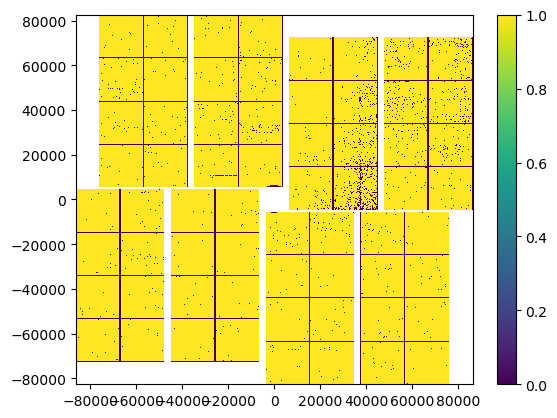

In [61]:
pcm = plot_jungfrau(-y,x,cmask,vmin=0,vmax=1)
plt.colorbar(pcm)

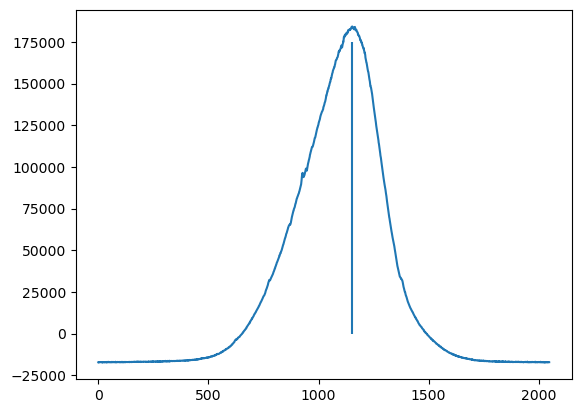

In [84]:
# Plotting the averaged spectrum so that we can set a cutoff for the pump pulse vs the probe. The pump should be on the right, and the prove on the left.
specThresh = 1150
fig = plt.plot(np.mean(spec,axis=0))
plt.vlines(specThresh,0,175000)

In [90]:
# Determining the r1 = I2/(I1+I2) and the opposite
pumpFrac = np.sum(spec[:,0:specThresh],axis=1)/np.sum(spec,axis=1) # I2/(I1+I2)
probeFrac = 1-r1 # I1/(I1+I2)